In [5]:
import numpy as np
import pandas as pd
import os
import re



In [6]:
import os

# Create folder one level up
os.makedirs("../data", exist_ok=True)

# Download into that folder
!kaggle datasets download \
    -d andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews \
    -p ../data \
    --unzip

# List files
os.listdir("../data")


Dataset URL: https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews
License(s): CC0-1.0




  0%|          | 0.00/152M [00:00<?, ?B/s]
  1%|          | 1.00M/152M [00:00<01:34, 1.67MB/s]
  1%|▏         | 2.00M/152M [00:00<01:08, 2.31MB/s]
  2%|▏         | 3.00M/152M [00:01<00:57, 2.73MB/s]
  3%|▎         | 4.00M/152M [00:01<00:47, 3.28MB/s]
  3%|▎         | 5.00M/152M [00:01<00:43, 3.52MB/s]
  4%|▍         | 6.00M/152M [00:02<00:42, 3.57MB/s]
  5%|▍         | 7.00M/152M [00:02<00:39, 3.85MB/s]
  5%|▌         | 8.00M/152M [00:02<00:31, 4.72MB/s]
  6%|▌         | 9.00M/152M [00:02<00:28, 5.34MB/s]
  7%|▋         | 10.0M/152M [00:02<00:24, 6.08MB/s]
  7%|▋         | 11.0M/152M [00:02<00:21, 6.84MB/s]
  8%|▊         | 12.0M/152M [00:02<00:21, 6.87MB/s]
  9%|▉         | 14.0M/152M [00:03<00:16, 8.55MB/s]
 11%|█         | 17.0M/152M [00:03<00:11, 12.8MB/s]
 13%|█▎        | 20.0M/152M [00:03<00:08, 16.8MB/s]
 15%|█▌        | 23.0M/152M [00:03<00:07, 18.5MB/s]
 17%|█▋        | 26.0M/152M [00:03<00:06, 21.0MB/s]
 19%|█▉        | 29.0M/152M [00:03<00:05, 23.3MB/s]
 21%|██        | 32.

['rotten_tomatoes_movies.csv', 'rotten_tomatoes_movie_reviews.csv']

In [7]:

df = pd.read_csv("../data/rotten_tomatoes_movie_reviews.csv")
df.head()


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [9]:
#Cleaning the dataset



df = pd.read_csv(f"../data/rotten_tomatoes_movie_reviews.csv")

df = df[['reviewText', 'originalScore']]

def convert_score(score):
    if pd.isna(score):
        return None

    score = str(score).strip()

    fraction_match = re.match(r'^(\d+(\.\d+)?)/(\d+(\.\d+)?)$', score)
    if fraction_match:
        numerator = float(fraction_match.group(1))
        denominator = float(fraction_match.group(3))
        if denominator != 0:
            return numerator / denominator

    number_match = re.match(r'^(\d+(\.\d+)?)$', score)
    if number_match:
        return float(score)

    return None

df['originalScore'] = df['originalScore'].apply(convert_score)

df = df[(df['originalScore'] >= 0) & (df['originalScore'] <= 1)].reset_index(drop=True)
df = df.dropna(subset=['reviewText', 'originalScore'])

df = df.reset_index(drop=True)

print(df.head())
print(df.dtypes)
print(df.shape)


                                          reviewText  originalScore
0  Timed to be just long enough for most youngste...          0.875
1  It doesn't matter if a movie costs 300 million...          0.200
2  The film's out-of-touch attempts at humor may ...          0.500
3  With every new minute, there's another head-sc...          0.800
4  Emotionless reaction shots, zero characterizat...          0.700
reviewText           str
originalScore    float64
dtype: object
(778591, 2)


In [10]:
#Sentiment Analysis using textblob

from textblob import TextBlob

polarity_list = []
subjectivity_list = []

for text in df['reviewText']:
    analysis = TextBlob(text)
    polarity_list.append(analysis.sentiment.polarity)
    subjectivity_list.append(analysis.sentiment.subjectivity)

df['polarity'] = polarity_list
df['subjectivity'] = subjectivity_list

#Only focus on opinion based reviews

subjectivity_threshold = 0.6
df_cleaned = df[df['subjectivity'] >= subjectivity_threshold].copy()

df_cleaned.reset_index(drop=True, inplace=True)

print(df.head)
print(df.shape)

<bound method NDFrame.head of                                                reviewText  originalScore  \
0       Timed to be just long enough for most youngste...          0.875   
1       It doesn't matter if a movie costs 300 million...          0.200   
2       The film's out-of-touch attempts at humor may ...          0.500   
3       With every new minute, there's another head-sc...          0.800   
4       Emotionless reaction shots, zero characterizat...          0.700   
...                                                   ...            ...   
778586  Solid but not totally sold&#44; Thor&#58; Ragn...          0.700   
778587  Thor&#58; Love and Thunder is the most enterta...          0.800   
778588  &quot;Thor&#58; Love and Thunder&quot; is a st...          0.800   
778589  Across Taika Waititi&#8217;s film&#44; a war a...          0.250   
778590  It&#8217;s the jokes that make it&#44; with th...          0.625   

        polarity  subjectivity  
0       0.190000      0.

In [15]:
save_path = "../data/movieData_cleaned.csv"

df_cleaned.to_csv(save_path, index=False)

OUTPUT_DIR = "../output/"


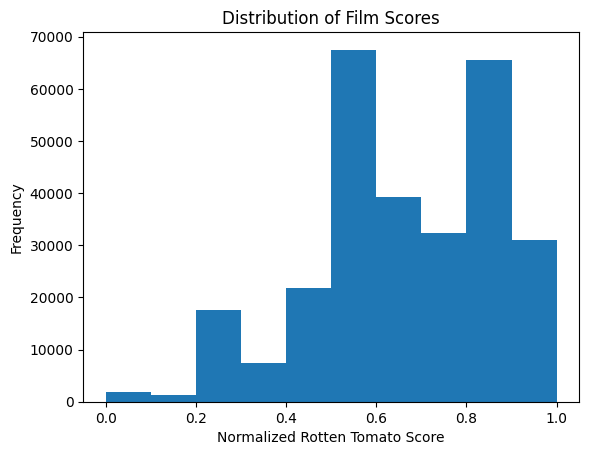

In [16]:
#Scatter plot

import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_cleaned['originalScore'], bins=10, range = (0,1))
plt.xlabel('Normalized Rotten Tomato Score')
plt.ylabel('Frequency')
plt.title('Distribution of Film Scores')
plt.savefig(f"{OUTPUT_DIR}/score_distribution.png")
plt.show()


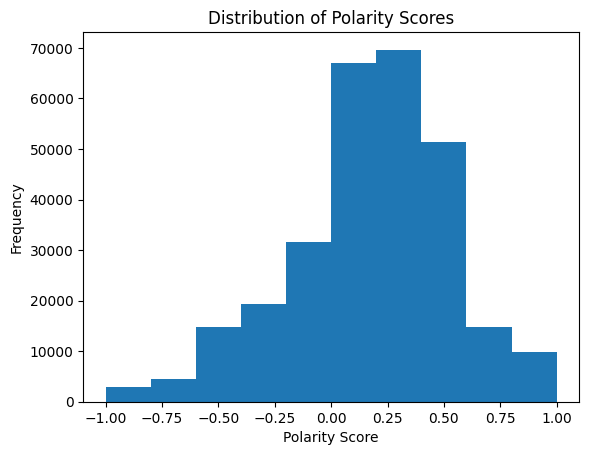

In [ ]:

plt.figure()
plt.hist(df_cleaned['polarity'], bins=10, range = (-1,1))
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity Scores')
plt.savefig(f"{OUTPUT_DIR}/score_polarity.png")
plt.show()


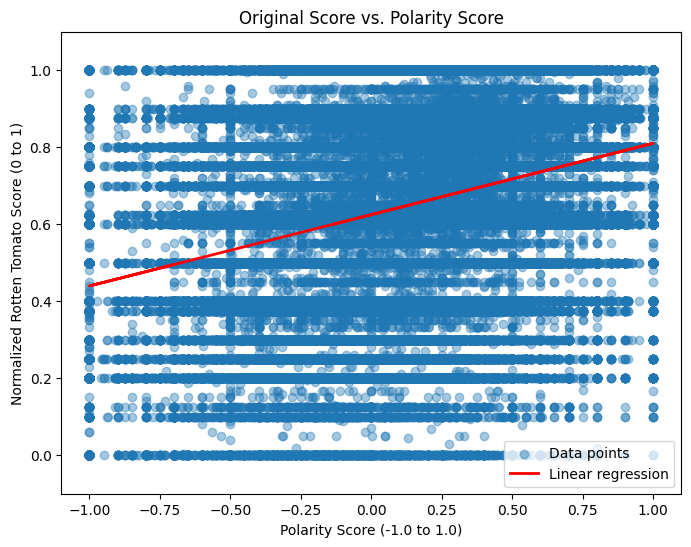

R²: 0.105
Slope: 0.185, Intercept: 0.625


In [ ]:
from sklearn.linear_model import LinearRegression

df_clean = df_cleaned.dropna(subset=['originalScore', 'polarity'])

X = df_clean['polarity'].values.reshape(-1, 1)
y = df_clean['originalScore'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.4, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear regression')
plt.xlabel('Polarity Score (-1.0 to 1.0)')
plt.ylabel('Normalized Rotten Tomato Score (0 to 1)')
plt.ylim(-.1,1.1)
plt.title('Original Score vs. Polarity Score')
plt.legend()
plt.savefig(f"{OUTPUT_DIR}/original_score_vs_polarity.png")
plt.show()

#R^2 and slope
r_squared = model.score(X, y)
print(f"R²: {r_squared:.3f}")
print(f"Slope: {model.coef_[0]:.3f}, Intercept: {model.intercept_:.3f}")
